<a href="https://colab.research.google.com/github/AneesurRehman347/ML-DL-Projects/blob/master/Plant%20Disease%20Detection/Plant_Disease_Detection_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras  import models, layers
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile #Import the zipfile module

dataset_dir = "https://github.com/AneesurRehman347/ML-DL-Projects/archive/refs/heads/master.zip" #Changed directory for zip file

dataset_zip = tf.keras.utils.get_file(
    origin=dataset_dir,
    extract=True,
    cache_subdir="datasets"
)

#Extract the zip file
with zipfile.ZipFile(dataset_zip, 'r') as zip_ref:
    zip_ref.extractall("datasets")

#Get the base directory
base_dir = os.path.join("datasets", 'ML-DL-Projects-master') #Set appropriate base directory for extracted files
dataset_dir = os.path.join(base_dir, 'Plant Disease Detection') #Added the correct subdirectory name

#Print to verify the path
print(dataset_dir)


dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    image_size=(256, 256),
    batch_size=32,
    shuffle=True
)

# val_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     dataset_dir,
#     validation_split=0.2,
#     subset="validation",
#     seed=123,
#     image_size=(256, 256),
#     batch_size=32,
#     label_mode='categorical',
#     shuffle=False
# )

datasets/ML-DL-Projects-master/Plant Disease Detection
Found 5702 files belonging to 3 classes.


In [2]:
class_name = dataset.class_names
print(class_name)

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [3]:
for i , j in dataset.take(1):
  print(j[2])

tf.Tensor(0, shape=(), dtype=int32)


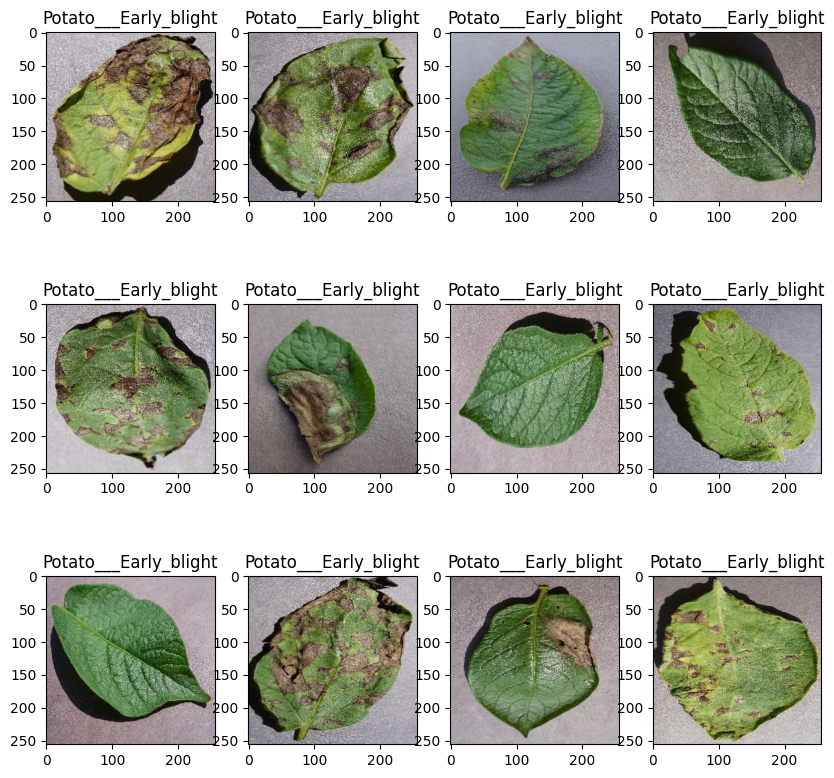

In [4]:
plt.figure(figsize=(10,10))
for image_batch,labels_batch in dataset.take(1):
  for i in range(12):
       plt.subplot(3,4,i+1)
       plt.imshow(image_batch[i].numpy().astype("uint8"))
       plt.title(class_name[np.argmax(labels_batch[i])])

In [5]:
len(dataset)*.8

143.20000000000002

In [6]:
train_ds = dataset.take(143)
len(train_ds)

143

In [7]:
test_ds = dataset.skip(143)
len(test_ds)

36

In [8]:
val_size = .1
len(dataset)*val_size

17.900000000000002

In [9]:
val_ds = test_ds.take(18)
len(val_ds)

18

In [10]:
test_ds = test_ds.skip(18)
len(test_ds)

18

In [11]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [12]:
train_ds , val_ds , test_ds = get_dataset_partitions_tf(dataset)

In [13]:
train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [14]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.experimental.preprocessing.Resizing(256,256),
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)


])

In [15]:
model = models.Sequential([

    data_augmentation,
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(32,256,256,3))
    ,layers.MaxPooling2D((2,2)),
     layers.Conv2D(64, kernel_size=(3,3), activation='relu')
    ,layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu',)
    ,layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax'),

])
model.build(input_shape=(32,256,256,3))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [16]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [17]:
history = model.fit(
    train_ds,
    epochs=7,
    batch_size = 32,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/7
143/143 [==============================] - 74s 503ms/step - loss: 0.6827 - accuracy: 0.7061 - val_loss: 0.5488 - val_accuracy: 0.8166
Epoch 2/7
143/143 [==============================] - 72s 497ms/step - loss: 0.2461 - accuracy: 0.9087 - val_loss: 0.4456 - val_accuracy: 0.8456
Epoch 3/7
143/143 [==============================] - 71s 491ms/step - loss: 0.1675 - accuracy: 0.9349 - val_loss: 0.2770 - val_accuracy: 0.9081
Epoch 4/7
143/143 [==============================] - 71s 494ms/step - loss: 0.0933 - accuracy: 0.9620 - val_loss: 0.2592 - val_accuracy: 0.9118
Epoch 5/7
143/143 [==============================] - 71s 496ms/step - loss: 0.1091 - accuracy: 0.9569 - val_loss: 0.4892 - val_accuracy: 0.8603
Epoch 6/7
143/143 [==============================] - 71s 496ms/step - loss: 0.0765 - accuracy: 0.9712 - val_loss: 0.3341 - val_accuracy: 0.8824
Epoch 7/7
143/143 [==============================] - 70s 490ms/step - loss: 0.0706 - accuracy: 0.9736 - val_loss: 0.2218 - val_accuracy:

Text(0.5, 1.0, 'Training and Validation Accuracy')

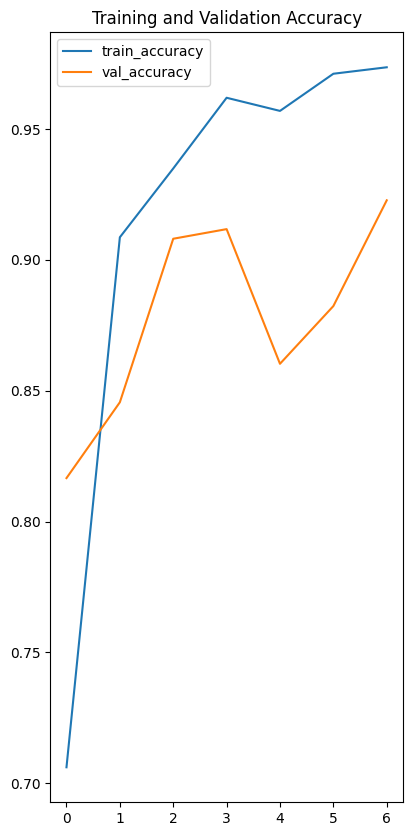

In [20]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title("Training and Validation Accuracy")

1/1 [==============================] - 0s 115ms/step
[9.9999994e-01 2.0758914e-11 2.2918610e-16]
Potato___Early_blight


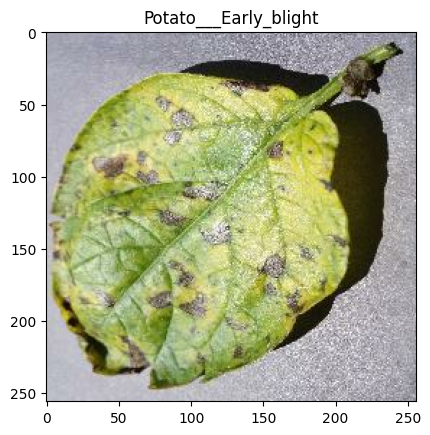

In [32]:
for images_batch,lables_batch in test_ds.take(1):
  plt.imshow(images_batch[0].numpy().astype('uint8'))
  plt.title(class_name[lables_batch[0].numpy()])
  batch_pred = model.predict(images_batch)
  print(batch_pred[0])
  print(class_name[np.argmax(batch_pred[0])])


In [ ]:
model_version =1
model.save('https://github.com/AneesurRehman347/ML-DL-Projects/tree/master')